In [39]:
import csv
import pandas as pd
import sqlite3

In [40]:
conn = sqlite3.connect('im.db')

In [41]:
from sqlalchemy import create_engine

# Replace 'your_database' and 'your_table' with the actual database and table names
table_name = 'bom'

df = pd.read_csv("bom.movie_gross.csv")

# Connect to the SQL database using SQLAlchemy
engine = create_engine('sqlite:///im.db')  # Replace with your actual database connection string

# Write the DataFrame to the SQL database
df.to_sql(table_name, engine, index=False, if_exists='replace')  # Change 'replace' to 'append' if needed

# Verify the data in the SQL table
sql_query = f'SELECT * FROM {table_name}'
df_from_sql = pd.read_sql(sql_query, engine)

# Display the DataFrame from SQL
print(df_from_sql)


                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [42]:
first_query = """ 
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom
ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

# Use the line below to check your query's output
pd.read_sql(first_query, conn)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,None,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
...,...,...,...,...,...,...,...,...,...,...,...
1886,tt8878922,They Shall Not Grow Old,They Shall Not Grow Old,2018,47.0,"Biography,Documentary,History",They Shall Not Grow Old,WB,18000000.0,None,2018
1887,tt9042690,The Negotiation,The Negotiation,2018,89.0,"Documentary,History,War",The Negotiation,CJ,111000.0,None,2018
1888,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Last Letter,CL,181000.0,None,2018
1889,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018


In [13]:
 # Delete rows with NULL in "foreign_gross" column in "bom" table
delete_query = """
DELETE FROM bom
WHERE foreign_gross IS NULL;
"""
conn.execute(delete_query)
conn.commit()


In [14]:
 # Delete rows with NULL in "foreign_gross" column in "bom" table
delete_query = """
DELETE FROM bom
WHERE domestic_gross IS NULL;
"""
conn.execute(delete_query)
conn.commit()

In [15]:
# Use the line below to check your query's output
pd.read_sql(first_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",The Rum Diary,FD,13100000.0,10800000,2011
...,...,...,...,...,...,...,...,...,...,...,...
1274,tt7785302,Spotlight,Spotlight,2015,99.0,Drama,Spotlight,ORF,45100000.0,53200000,2015
1275,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",The Mule,WB,103800000.0,68700000,2018
1276,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Nobody's Fool,Par.,31700000.0,1800000,2018
1277,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,How Long Will I Love U,WGUSA,747000.0,82100000,2018


In [25]:
# Get information about columns in the "movie_ratings" table
columns_query = """
PRAGMA table_info(movie_ratings);
"""

columns_info = pd.read_sql(columns_query, conn)
print(columns_info)


   cid           name     type  notnull dflt_value  pk
0    0       movie_id     TEXT        0       None   0
1    1  averagerating     REAL        0       None   0
2    2       numvotes  INTEGER        0       None   0


In [46]:
# First Query: Combine tables without additional conditions
first_query = """
SELECT mb.*, bom.*, mr.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year
LEFT JOIN movie_ratings mr ON mb.primary_title = mr.movie_id;
"""

# Use the line below to check your query's output
cleaned_data = pd.read_sql(first_query, conn)
print(cleaned_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [47]:
# Display the first few rows of the cleaned_data DataFrame
cleaned_data.head(15)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,movie_id,averagerating,numvotes
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,None,2016,None,None,None
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000,2012,None,None,None
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,None,None,None
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,None,None,None
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015,None,None,None
5,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",The Rum Diary,FD,13100000.0,10800000,2011,None,None,None
6,tt0376479,American Pastoral,American Pastoral,2016,108.0,"Crime,Drama",American Pastoral,LGF,544000.0,None,2016,None,None,None
7,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",The Three Stooges,Fox,44300000.0,10500000,2012,None,None,None
8,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000,2010,None,None,None
9,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",John Carter,BV,73100000.0,211100000,2012,None,None,None


In [50]:
# Check for null values in "averagerating" and "numvotes" columns
null_check_query = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NULL OR numvotes IS NULL;
"""

null_check_data = pd.read_sql(null_check_query, conn)
print(null_check_data)


Empty DataFrame
Columns: [movie_id, averagerating, numvotes]
Index: []


In [51]:
# Simplified Query: Join only "movie_basics" and "bom"
simplified_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

# Use the line below to check your query's output
simplified_data = pd.read_sql(simplified_query, conn)
print(simplified_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [52]:
# Updated Query: Include "movie_ratings" with adjusted join conditions
updated_query = """
SELECT mb.*, bom.*, mr.averagerating, mr.numvotes
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year
LEFT JOIN movie_ratings mr ON mb.primary_title = mr.movie_id
WHERE (mr.averagerating IS NOT NULL OR mr.numvotes IS NOT NULL);
"""

# Use the line below to check your query's output
updated_data = pd.read_sql(updated_query, conn)
print(updated_data)


Empty DataFrame
Columns: [movie_id, primary_title, original_title, start_year, runtime_minutes, genres, title, studio, domestic_gross, foreign_gross, year, averagerating, numvotes]
Index: []


In [53]:
# Inspect data in "movie_basics" and "bom"
basics_bom_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

basics_bom_data = pd.read_sql(basics_bom_query, conn)
print(basics_bom_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [54]:
# Inspect data in "movie_ratings"
ratings_query = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NOT NULL OR numvotes IS NOT NULL;
"""

ratings_data = pd.read_sql(ratings_query, conn)
print(ratings_data)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [55]:
# Inspect joined data with "movie_ratings"
joined_data_query = """
SELECT mb.*, bom.*, mr.averagerating, mr.numvotes
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year
LEFT JOIN movie_ratings mr ON mb.primary_title = mr.movie_id
WHERE (mr.averagerating IS NOT NULL OR mr.numvotes IS NOT NULL);
"""

joined_data = pd.read_sql(joined_data_query, conn)
print(joined_data)


Empty DataFrame
Columns: [movie_id, primary_title, original_title, start_year, runtime_minutes, genres, title, studio, domestic_gross, foreign_gross, year, averagerating, numvotes]
Index: []


In [56]:
# Check for matching rows between "movie_basics" and "bom"
matching_rows_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

matching_rows_data = pd.read_sql(matching_rows_query, conn)
print(matching_rows_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [57]:
# Review data in "movie_ratings"
ratings_data_query = """
SELECT *
FROM movie_ratings
WHERE averagerating IS NOT NULL OR numvotes IS NOT NULL;
"""

ratings_data = pd.read_sql(ratings_data_query, conn)
print(ratings_data)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [58]:
# Join "movie_basics" and "bom" first
joined_data_query = """
SELECT mb.*, bom.*
FROM movie_basics mb
INNER JOIN bom ON (mb.primary_title = bom.title OR mb.original_title = bom.title)
   AND mb.start_year = bom.year;
"""

joined_data = pd.read_sql(joined_data_query, conn)
print(joined_data)


       movie_id                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt0359950  The Secret Life of Walter Mitty   
3     tt0365907      A Walk Among the Tombstones   
4     tt0369610                   Jurassic World   
...         ...                              ...   
1886  tt8878922          They Shall Not Grow Old   
1887  tt9042690                  The Negotiation   
1888  tt9078374                      Last Letter   
1889  tt9151704        Burn the Stage: The Movie   
1890  tt9461382                          Colette   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2     The Secret Life of Walter Mitty        2013            114.0   
3         A Walk Among the Tombstones        2014            114.0   
4                      Ju

In [61]:
# Specify the table name
table_name = "movie_basics"

# Construct the SQL query
query = f"SELECT * FROM {table_name};"

# Use the line below to check your query's output
table_data = pd.read_sql(query, conn)
print(table_data)


         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [62]:
# Specify the table name
table_name = "movie_ratings"

# Construct the SQL query
query = f"SELECT * FROM {table_name};"

# Use the line below to check your query's output
table_data = pd.read_sql(query, conn)
print(table_data)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [65]:
# SQL Query: Group by genre and calculate the total number of movies for each genre over the years
genres_query = """
SELECT genres, COUNT(*) as movie_count
FROM movie_basics
GROUP BY genres;
"""

# Use the line below to check your query's output
genres_data = pd.read_sql(genres_query, conn)

# Display the top 10 most popular genres
top_genres = genres_data.sort_values(by='movie_count', ascending=False).head(20)
print(top_genres)


                             genres  movie_count
695                     Documentary        32185
795                           Drama        21486
495                          Comedy         9177
0                              None         5408
993                          Horror         4372
528                    Comedy,Drama         3519
1079                       Thriller         3046
1                            Action         2219
434           Biography,Documentary         2115
873                   Drama,Romance         2079
538            Comedy,Drama,Romance         1558
696               Documentary,Drama         1554
609                  Comedy,Romance         1507
1062                        Romance         1454
752               Documentary,Music         1365
888                  Drama,Thriller         1335
731             Documentary,History         1289
1014                Horror,Thriller         1253
438   Biography,Documentary,History         1230
435     Biography,Do

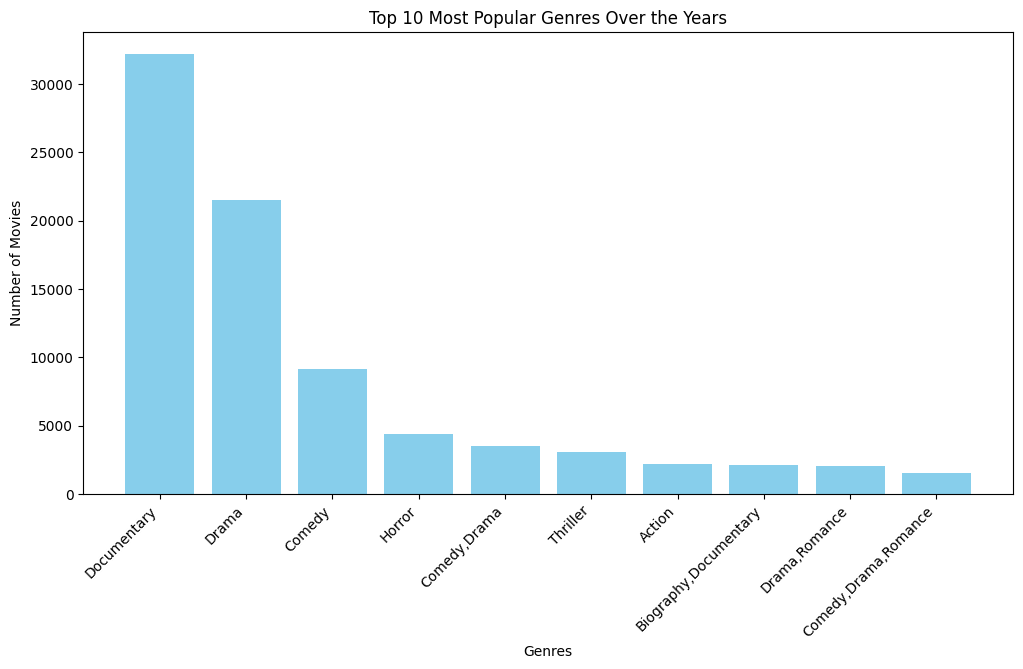

In [67]:
import matplotlib.pyplot as plt

# Assuming you have already executed the genres_query
# Display the top 10 most popular genres
top_genres = genres_data.dropna(subset=['genres']).sort_values(by='movie_count', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(top_genres['genres'], top_genres['movie_count'], color='skyblue')
plt.title('Top 10 Most Popular Genres Over the Years')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


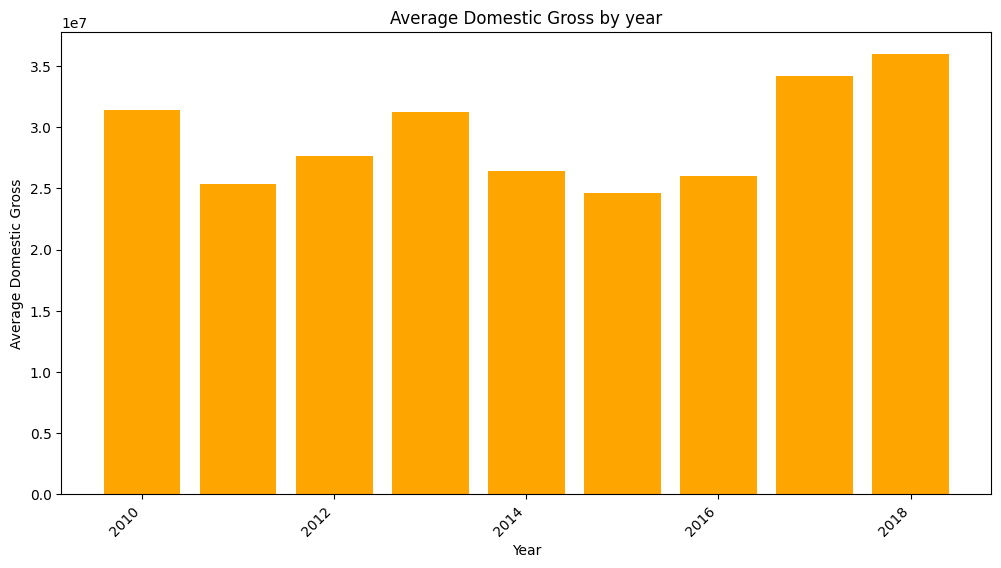

In [75]:
# Example SQL query to retrieve box office data
box_office_query = """
SELECT year, AVG(domestic_gross) as avg_domestic_gross
FROM bom
GROUP BY year;
"""

box_office_data = pd.read_sql(box_office_query, conn)

# Bar chart for box office data
plt.figure(figsize=(12, 6))
plt.bar(box_office_data['year'], box_office_data['avg_domestic_gross'], color='orange')
plt.title('Average Domestic Gross by year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.show()


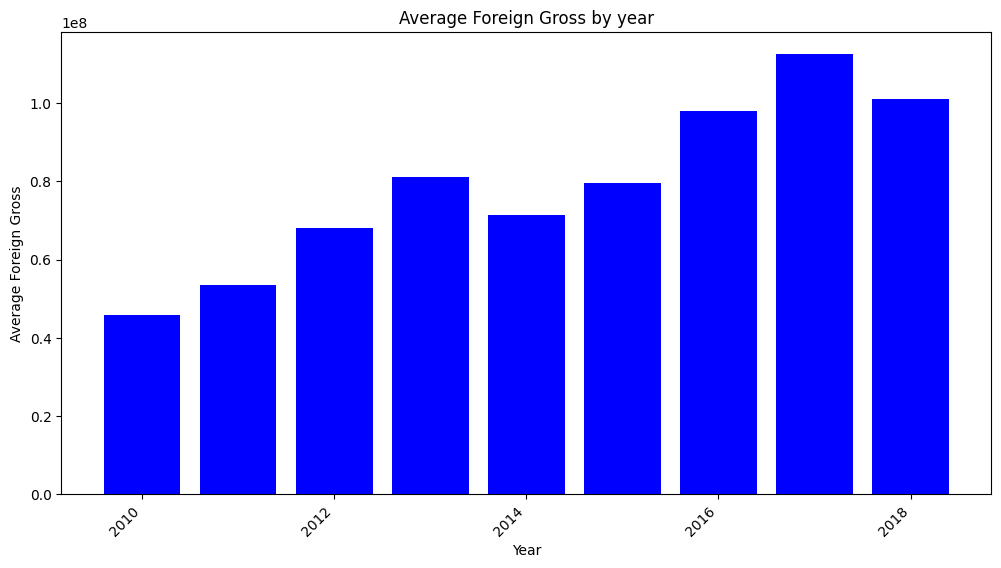

In [74]:
# Example SQL query to retrieve box office data
box_office_query = """
SELECT year, AVG(foreign_gross) as avg_foreign_gross
FROM bom
GROUP BY year;
"""

box_office_data = pd.read_sql(box_office_query, conn)

# Bar chart for box office data
plt.figure(figsize=(12, 6))
plt.bar(box_office_data['year'], box_office_data['avg_foreign_gross'], color='blue')
plt.title('Average Foreign Gross by year')
plt.xlabel('Year')
plt.ylabel('Average Foreign Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

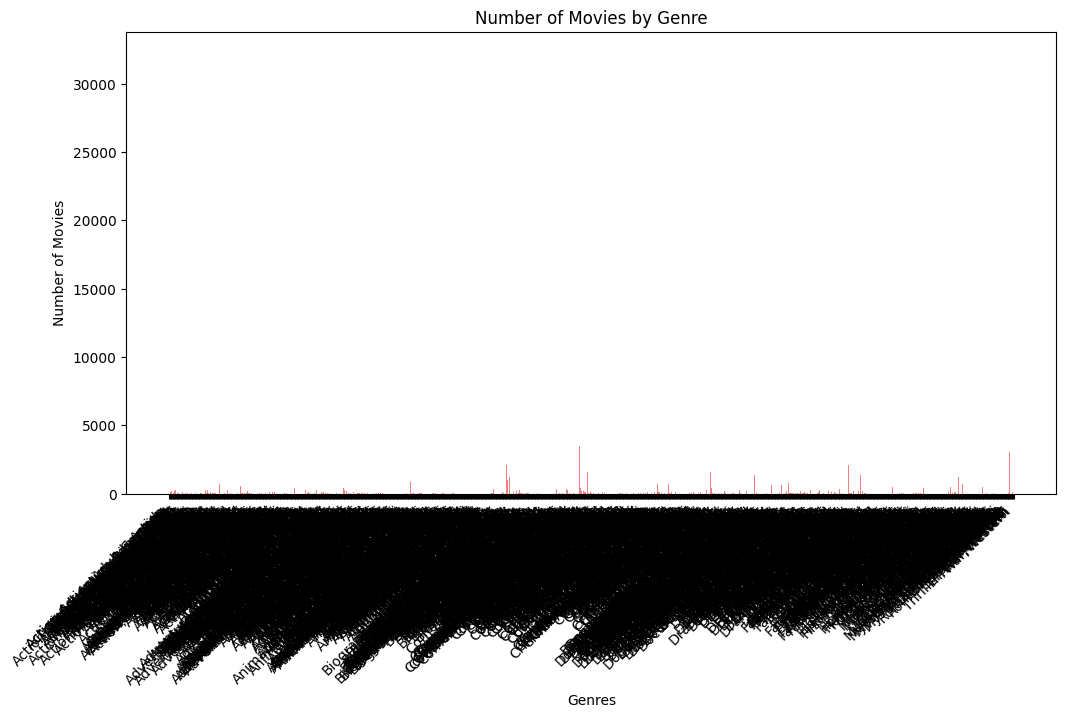

In [80]:
# SQL query and bar chart for genre combinations
combinations_query = """
SELECT genres, COUNT(*) as movie_count
FROM movie_basics
WHERE genres IS NOT NULL
GROUP BY genres;
"""

combinations_data = pd.read_sql(combinations_query, conn)

plt.figure(figsize=(12, 6))
plt.bar(combinations_data['genres'], combinations_data['movie_count'], color='lightcoral')
plt.title('Number of Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [83]:
import pandas as pd

# Name the file path
file_path = 'bom.movie_gross.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the entire DataFrame
print(data)

# Or display the first few rows using the head() method
print(data.head(20))


                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [85]:
# Clean the DataFrame by removing rows with null values
cleaned_data = data.dropna()
# Display the cleaned DataFrame
print(cleaned_data.head(5))

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


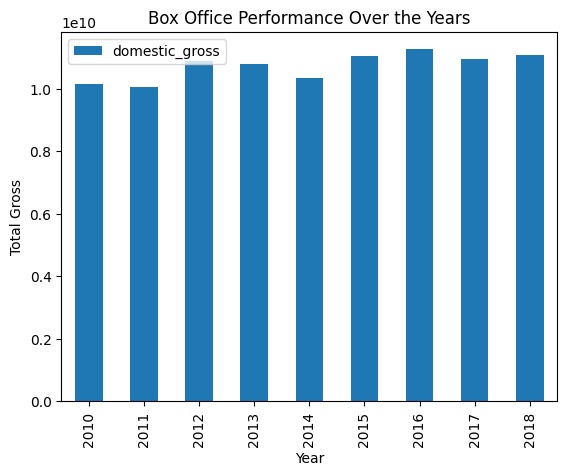

In [86]:
# Total domestic and foreign gross over the years
total_gross_over_years = df.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Plotting
total_gross_over_years.plot(kind='bar', stacked=True)
plt.title('Box Office Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.show()


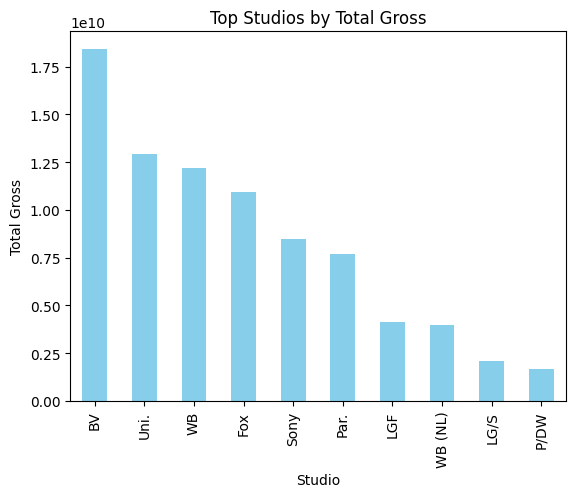

In [88]:
# Total gross by studio
studio_total_gross = df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Plotting
studio_total_gross.plot(kind='bar', color='skyblue')
plt.title('Top Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Total Gross')
plt.show()


domestic_gross    float64
foreign_gross      object
dtype: object
domestic_gross    float64
foreign_gross     float64
dtype: object


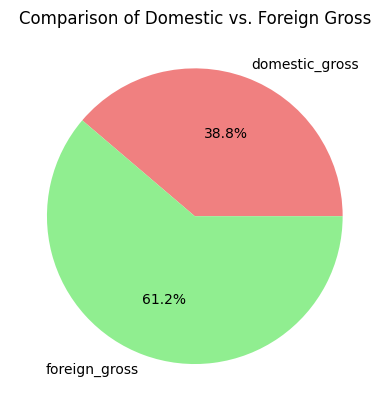

In [90]:
# Check data types of 'domestic_gross' and 'foreign_gross' columns
print(df[['domestic_gross', 'foreign_gross']].dtypes)

# Convert columns to numeric if needed
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

# Check again after conversion
print(df[['domestic_gross', 'foreign_gross']].dtypes)

# Total domestic vs. foreign gross
total_gross_comparison = df[['domestic_gross', 'foreign_gross']].sum()

# Plotting
total_gross_comparison.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Comparison of Domestic vs. Foreign Gross')
plt.show()


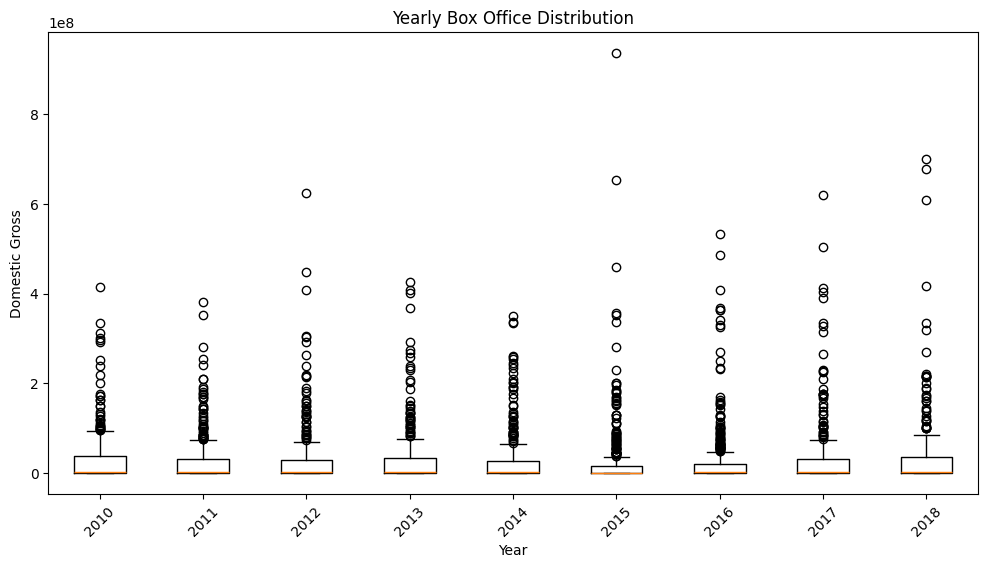

In [93]:
import matplotlib.pyplot as plt

# Box plot for yearly distribution
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['year'] == year]['domestic_gross'].dropna() for year in df['year'].unique()],
            labels=df['year'].unique())
plt.title('Yearly Box Office Distribution')
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45)
plt.show()


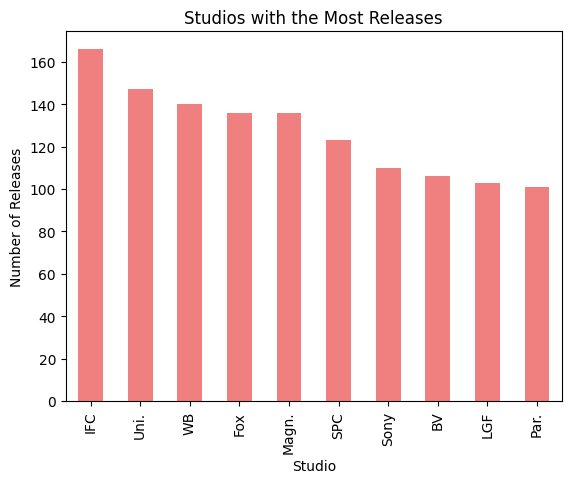

In [94]:
# Number of releases by studio
studio_movie_count = df['studio'].value_counts().head(10)

# Plotting
studio_movie_count.plot(kind='bar', color='lightcoral')
plt.title('Studios with the Most Releases')
plt.xlabel('Studio')
plt.ylabel('Number of Releases')
plt.show()


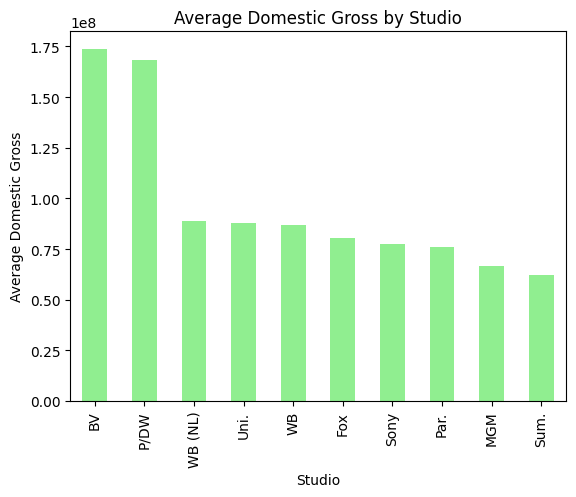

In [95]:
# Average domestic gross by studio
studio_avg_gross = df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(10)

# Plotting
studio_avg_gross.plot(kind='bar', color='lightgreen')
plt.title('Average Domestic Gross by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Domestic Gross')
plt.show()


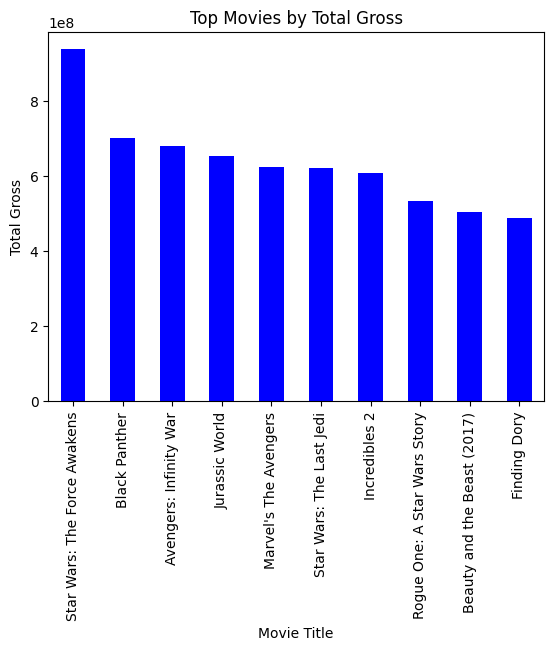

In [97]:
# Top movies by total gross
top_movies = df.groupby('title')['domestic_gross'].sum().sort_values(ascending=False).head(10)

# Plotting
top_movies.plot(kind='bar', color='blue')
plt.title('Top Movies by Total Gross')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross')
plt.show()
